### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

#### 1. Descriptive Analytics for Numerical Columns

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('sales_data_with_discounts.csv')   # loading Dataset

In [5]:
df.shape

(450, 13)

In [6]:
num_col= df.select_dtypes(include=[np.number])     # Identifying Numerical columns in dataset
num_col.columns.tolist()                       

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

Calculating Mean, Median, Mode and Standard Deviation for Numerical columns

In [8]:
mean_col= num_col.mean()    # Mean
mean_col

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [9]:
median_col= num_col.median()    # Median
median_col

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [10]:
mode_col= stats.mode(num_col).mode[0]   # Mode
mode_col

3.0

In [11]:
std_dev_col= np.std(num_col)     # Standard Deviation
std_dev_col

Volume                   4.226898
Avg Price            18059.804884
Total Sales Value    50478.892861
Discount Rate (%)        4.215910
Discount Amount       4504.889173
Net Sales Value      46307.118357
dtype: float64

Interpretation:  
After calculating these statistics,  
Mean gives the average value.  
Median provides the middle value.  
Mode helps identify the most common value. Mode syntax is differ from mean and median due to multiple values that   appear most frequently.  
Standard Deviation shows the extent of variation from mean.


## 2. Data Visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

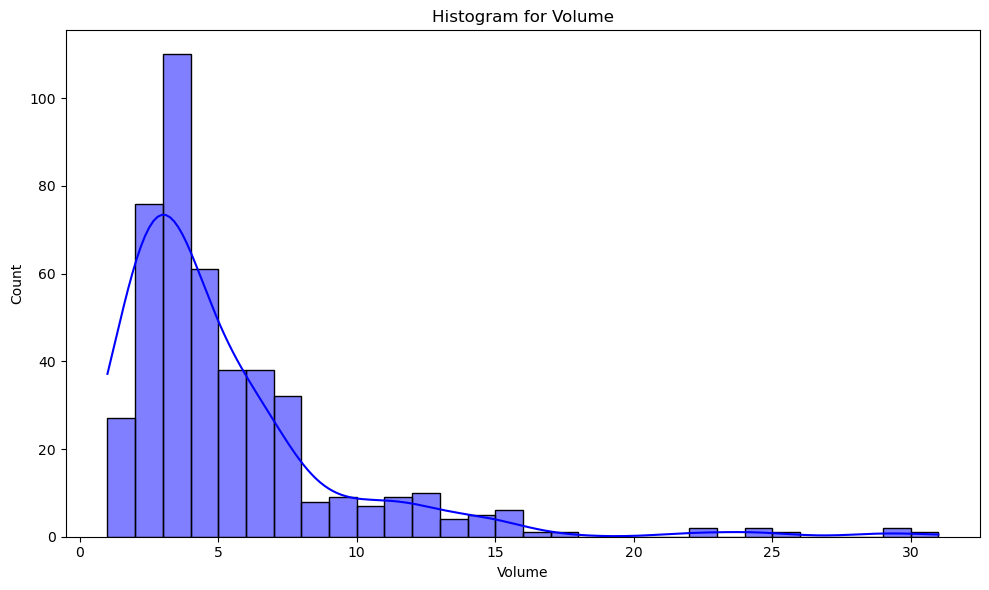

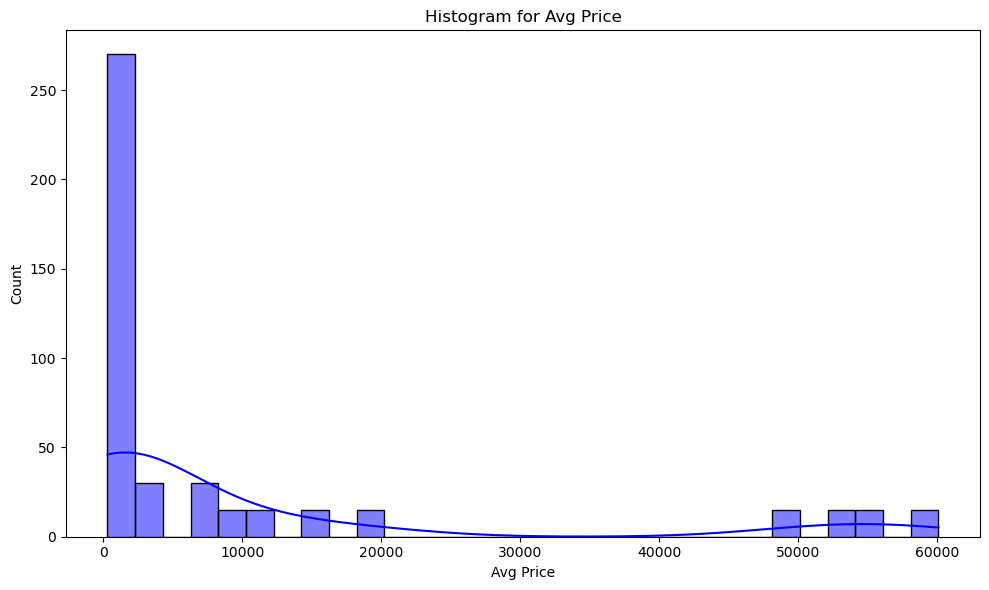

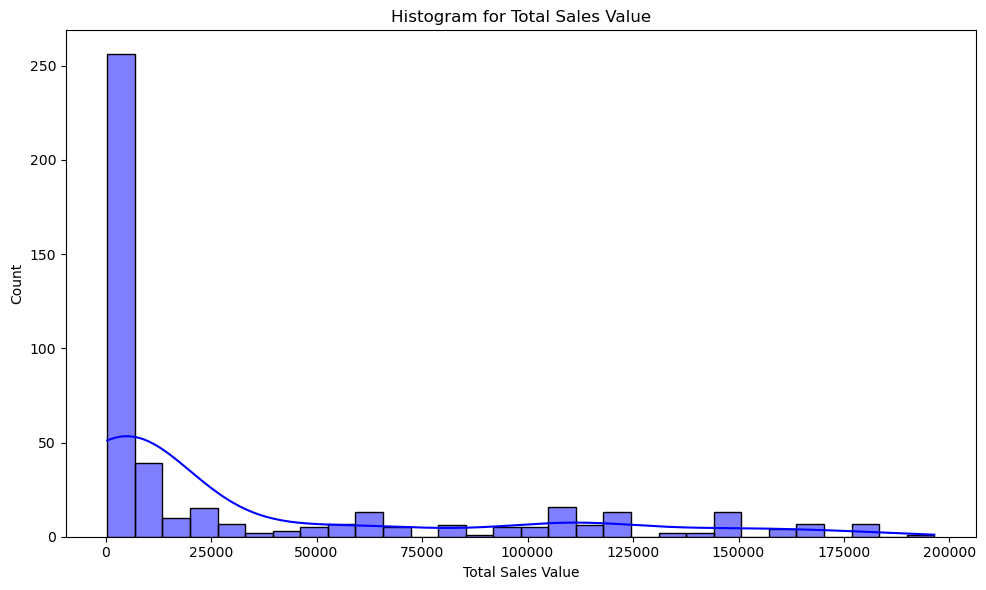

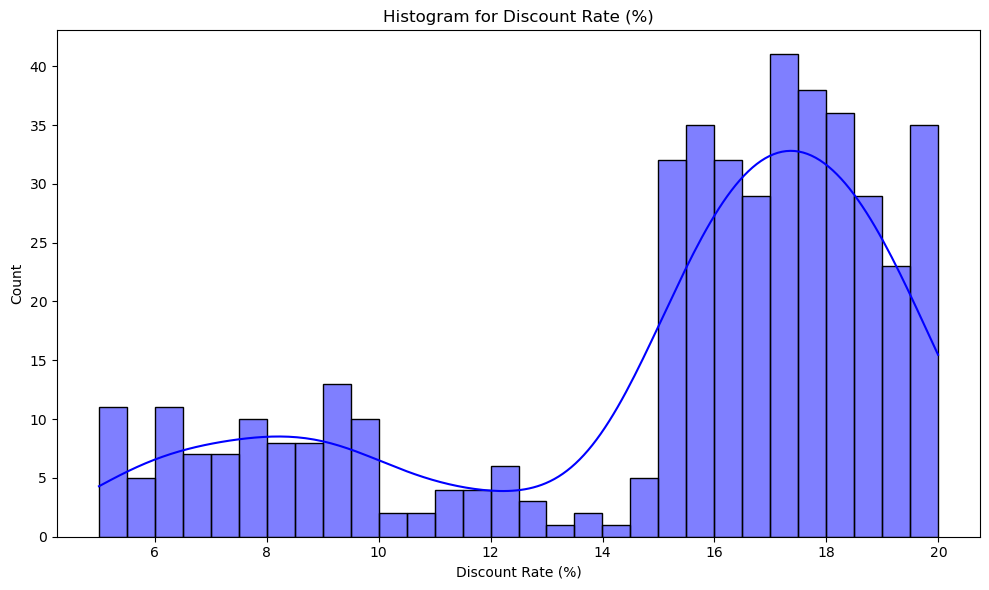

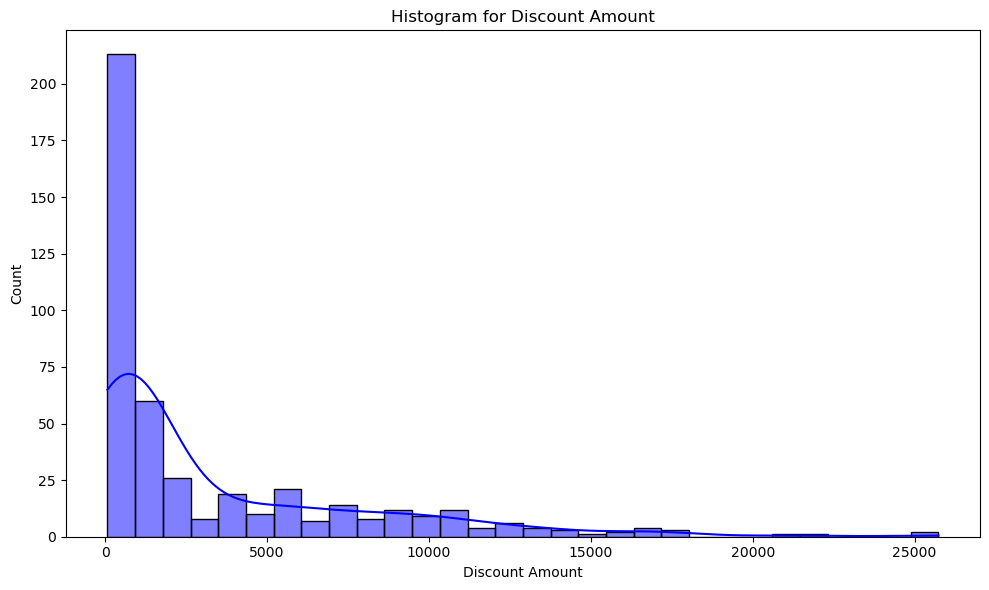

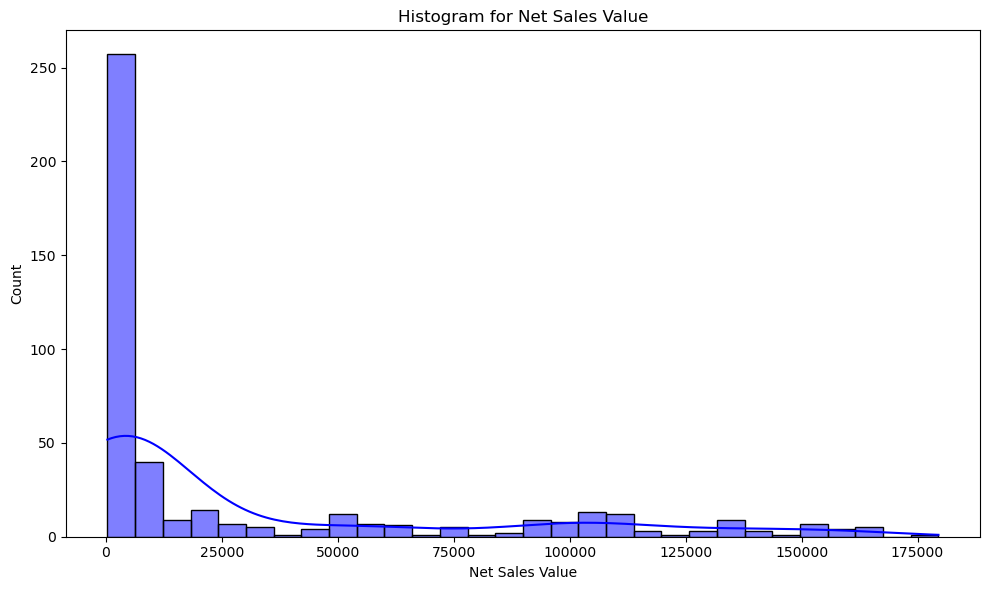

In [32]:
for col in num_col:
    plt.figure(figsize=(10,6))
    sns.histplot(num_col[col],kde=True,color='blue',bins=30)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [36]:
from scipy.stats import skew   # skewness
skewness_col=stats.skew(num_col)
skewness_col

array([ 2.72260944,  1.90250427,  1.52960882, -1.0587501 ,  1.90665503,
        1.53568092])

Inferences:  
From the histograms of numerical columns,  
Volume - positively skewed.   
Avg Price - positively skewed.  
Total Sales Values - positively skewed.  
Discount Rate - negatively skewed.  
Discount Amount- positively skewed.  
Net Sales Value- positively skewed.  
All the numerical columns have Outliers.  

<Axes: >

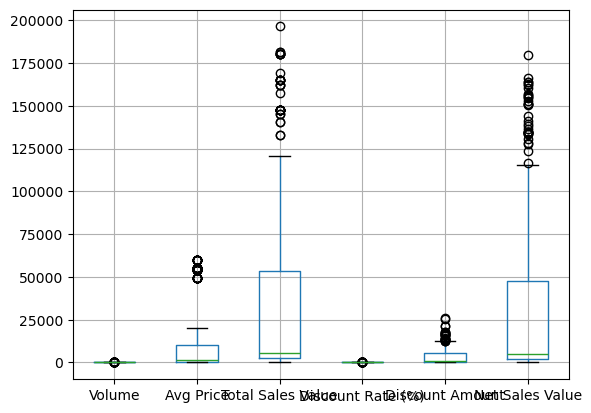

In [40]:
num_col.boxplot()    # Boxplot

In [44]:
Q1= np.percentile(num_col,25)      # Outliers Detection using InterQuartile Range (IQR)
Q3= np.percentile(num_col,75)
IQR= Q3-Q1
lower_bound= Q1-(1.5*IQR)
upper_bound= Q3+(1.5*IQR)
print(lower_bound, upper_bound)

-8415.19388459501 14069.943758049845


In [54]:
outliers_num= num_col[(num_col<lower_bound) | (num_col>upper_bound)]
print(f"Number of Outliers: {len(outliers_num)}")
print(f"Outliers: {outliers_num}".count)

Number of Outliers: 450
<built-in method count of str object at 0x0000020EB1A7D980>


In [56]:
cat_col= df.select_dtypes(include=['object','category'])   # Categorical Columns
cat_col.columns.tolist()

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

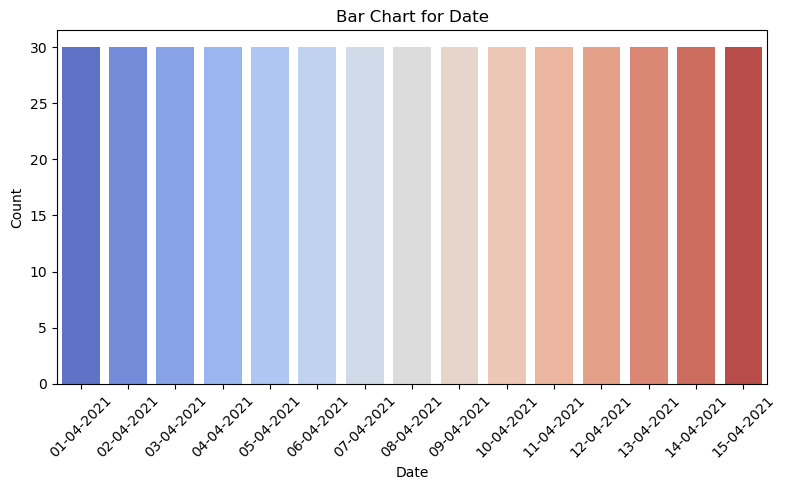

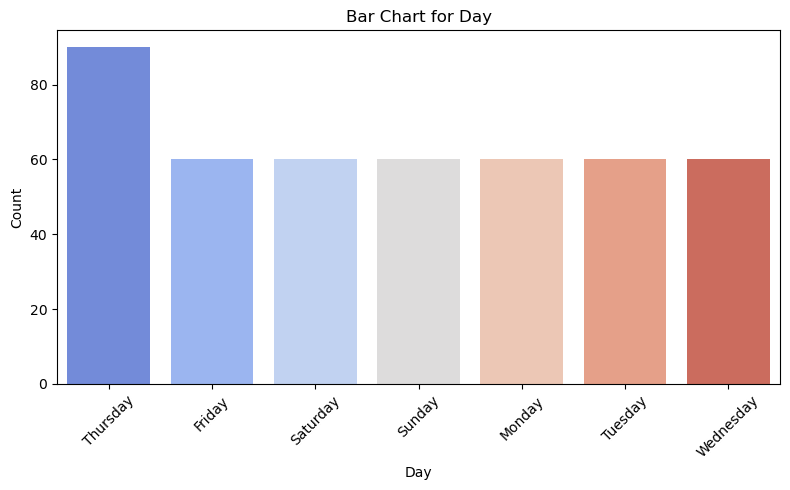

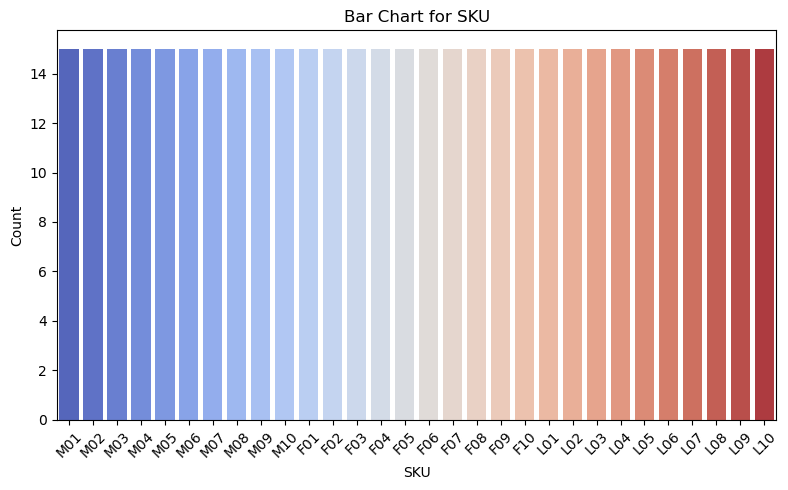

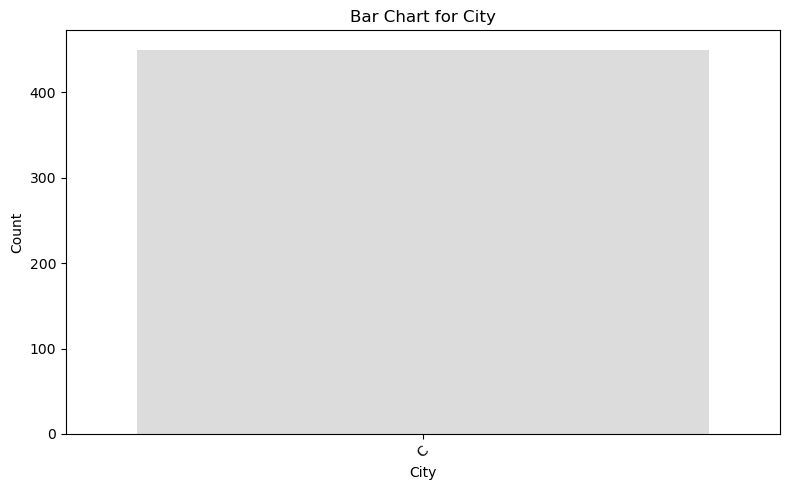

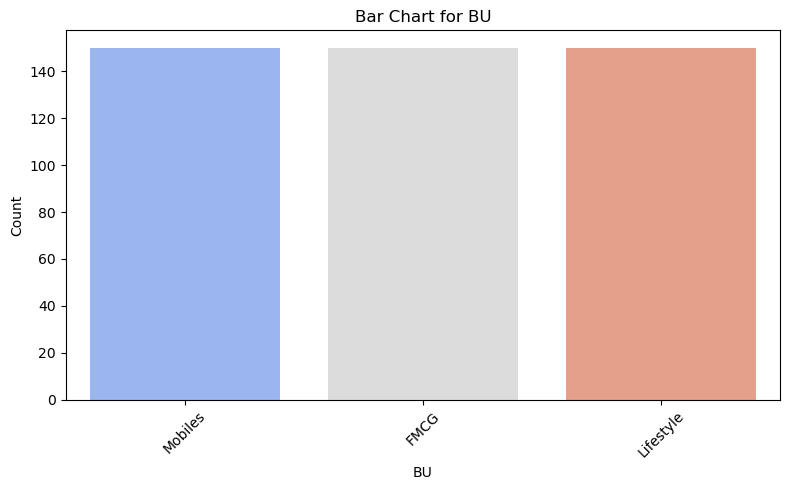

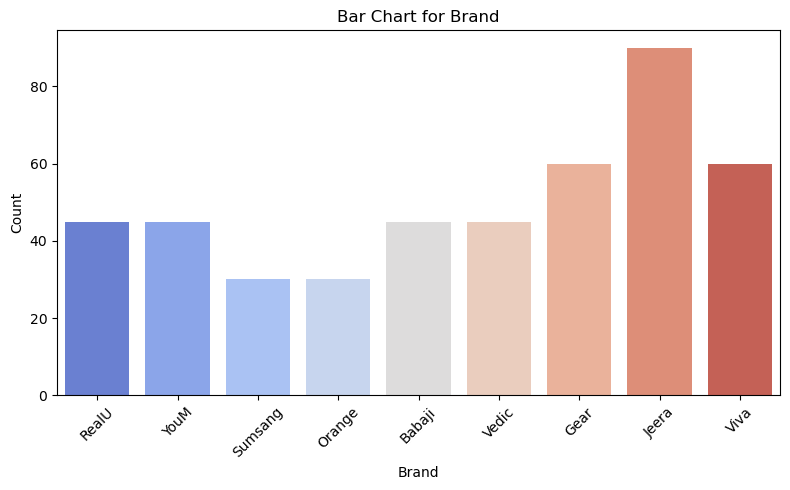

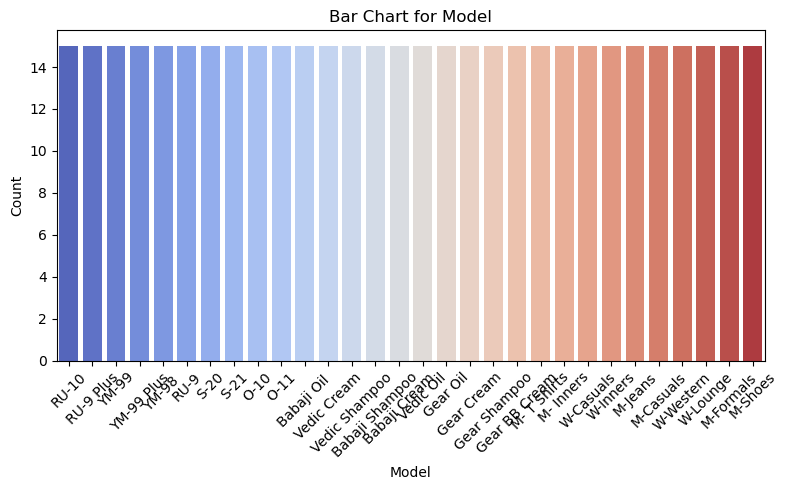

In [58]:
for col in cat_col:                                         # Bar Chart
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,palette='coolwarm')
    plt.title(f"Bar Chart for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Insights:  
Date,SKU,Model columns exhibit uniform distributions.  
City column has no variability since only one value ('C') exists.  
Jeera stands out as the most popular brand.  
Thursday is highly presented than other days.  

## 3. Standardization of Numerical Variable

Standardization: Also Z-Score Normalization transforms numerical data to have a mean of 0 and a standard deviation of 1.  
This ensures all variables are on same scale,improving performance in models sensitive to magnitude differences.

In [63]:
z_score= (num_col-mean_col)/std_dev_col # Standardized numerical columns using formulae
z_score.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


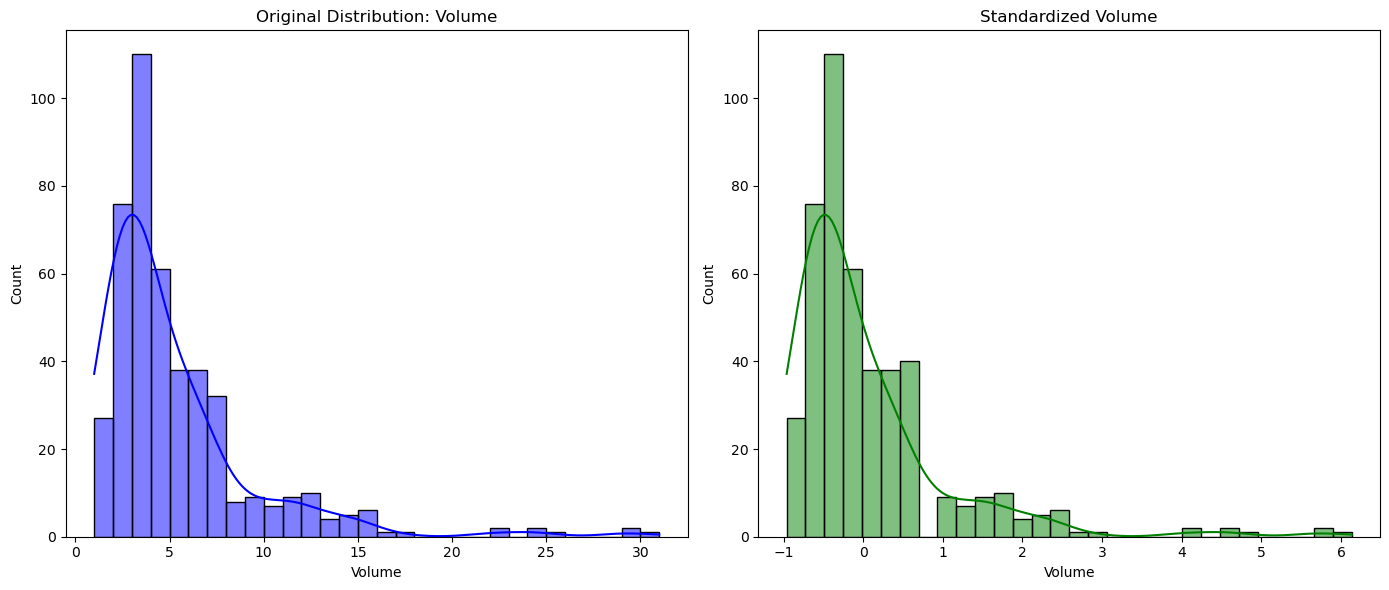

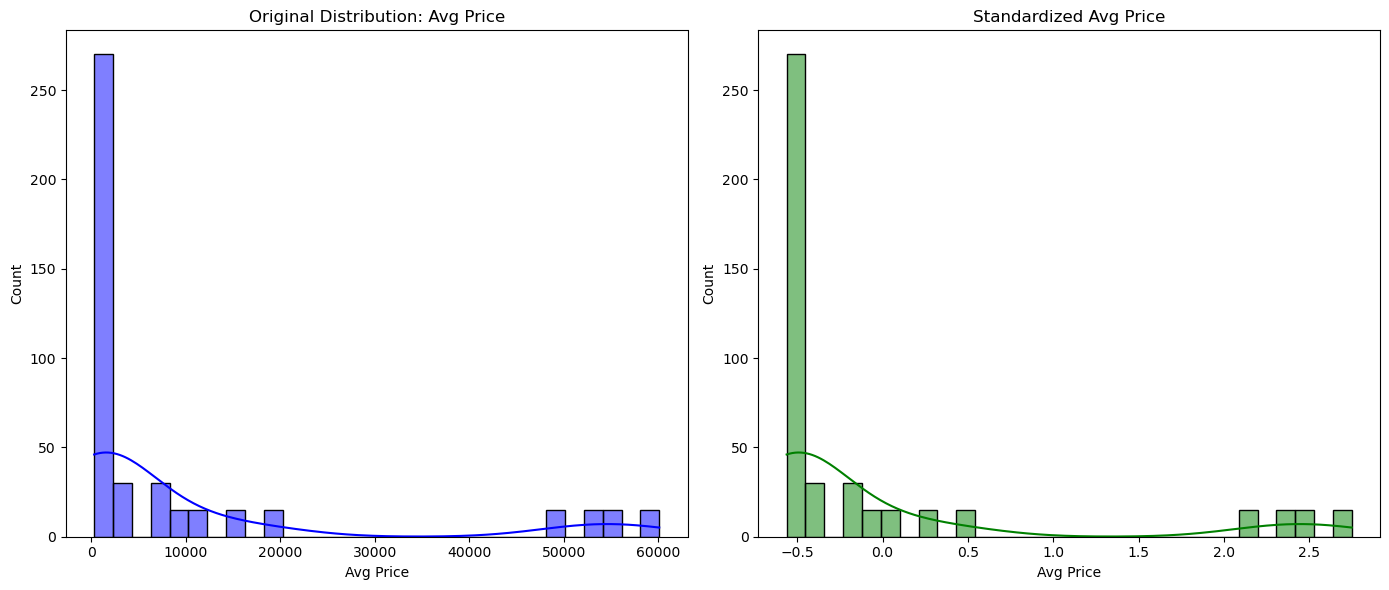

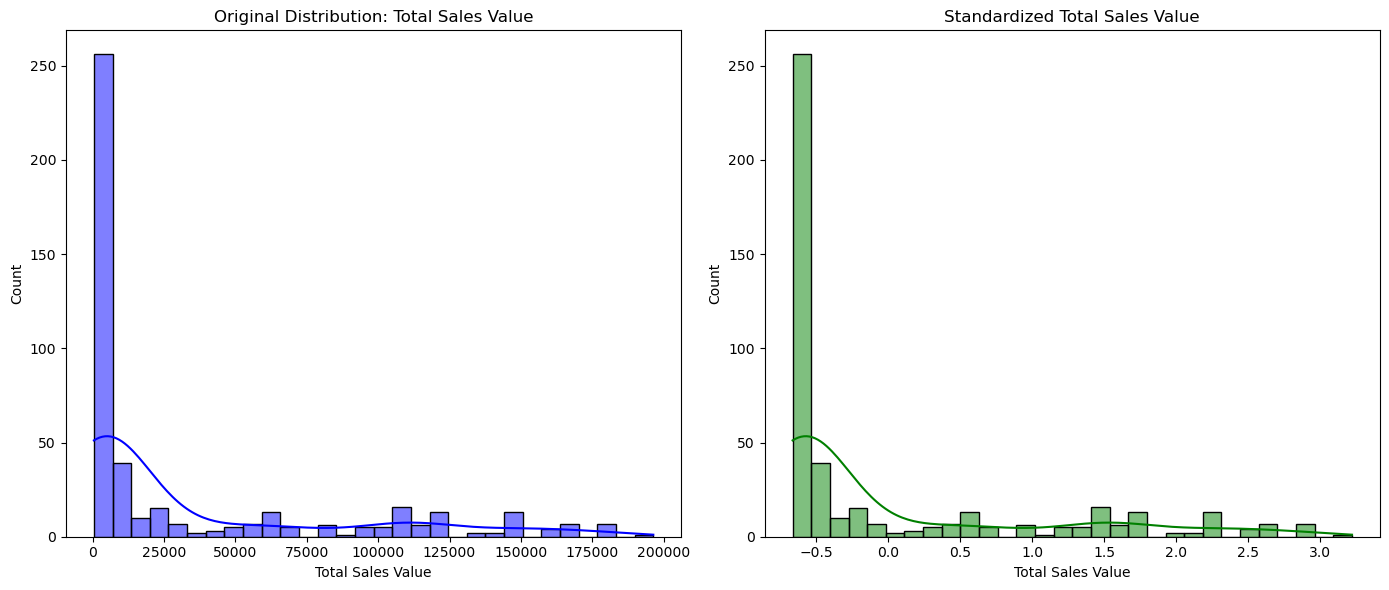

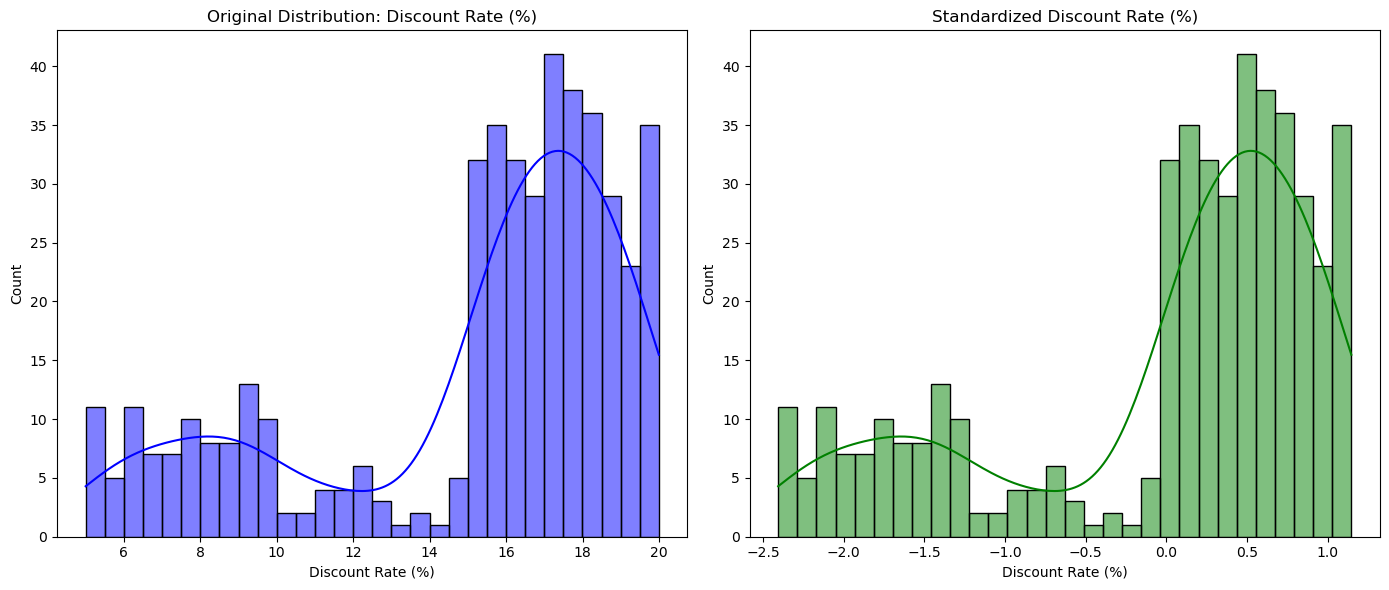

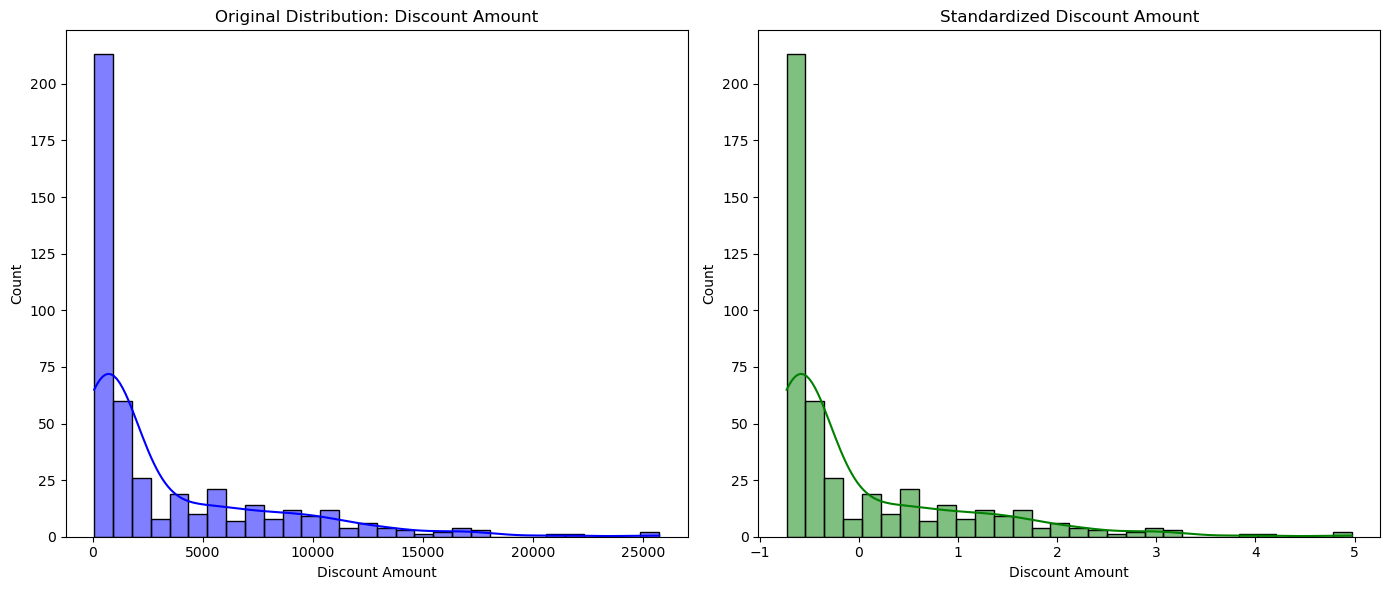

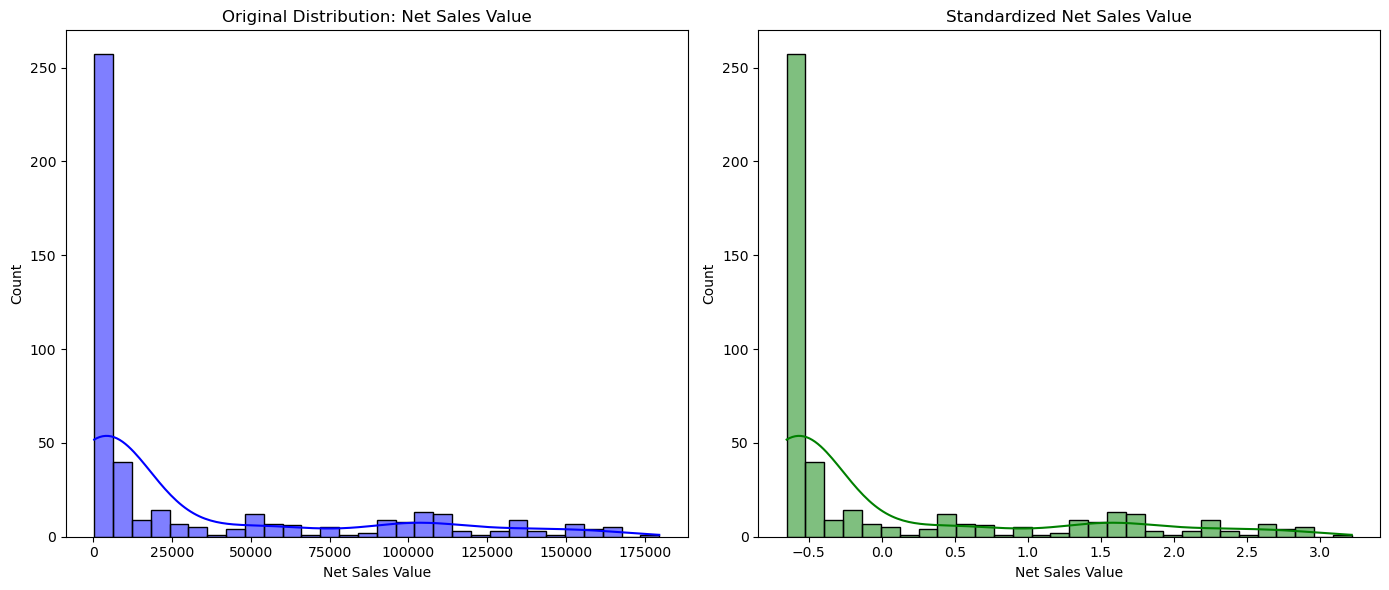

In [65]:
for col in num_col:
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.histplot(num_col[col],kde=True,color='blue',bins=30)
    plt.title(f"Original Distribution: {col}",)
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.histplot(z_score[col],kde=True,color='green',bins=30)
    plt.title(f"Standardized {col}")
    plt.tight_layout()
    plt.show()
    

## 4. Conversion of Categorical Data into Dummy Variables

Many machine learning algorithms cannot work directly with categorical data because they operate on numerical input.  
One-hot encodeing converts categorical variables into binary (0 or 1) columns, making them compatible with such algorithms.

In [77]:
cat_col.columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [79]:
one_hot_cat= pd.get_dummies(cat_col,drop_first=True)  # converting categorical columns into dummy variables

In [83]:
print('Original Dataset:')
print(df)
print('\nTransformed Dataset (One-Hot Encoded):')
print(one_hot_cat)

Original Dataset:
           Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Dis

## Conclusion

1. Central tendency measures like mean and median highlighted data trends, while variability metrics revealed spread of numerical variables.  
2. Visualization identifies outliers and skewness, offering insights into data distribution.  
3. Standardization scales numerical variables uniformly.  
4. One-hot encoding transforms categorical variables into binary vectors, which are interpretable for machine learning algorithms.  